# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
# ... ENTER YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt

#Pasamos los datos a Array de Numpy
X, Y = np.array(x), np.array(y)

#Creamos la matriz de coeficientes
Xlen = len(X)
unos = np.ones(Xlen)
A = np.c_[unos, X]

#Resolvemos el sistema At * A * x = At  * y (Sistema lineal de la forma Ax = b)
AtA = np.transpose(A) @ A
AtY = np.transpose(A) @ Y

#Resolvemos el sistema lineal
s = np.linalg.solve(AtA, AtY)

#Nos da como solucion s = [b, a]
p = np.poly1d([s[1], s[0]])

print(" mx + b")
print(p)

 mx + b
 
1.465 x - 0.648


### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

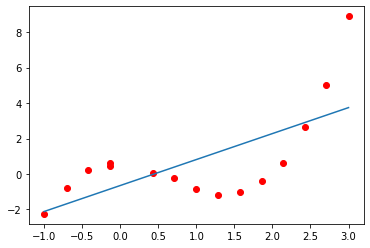

In [3]:
# ... ENTER YOUR CODE HERE

#Imprimimos
plt.plot(X, Y, "or")
x_plot = np.linspace(-1,3,100)
plt.plot(x_plot, p(x_plot))
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

 mx + b
 
1.465 x - 0.648


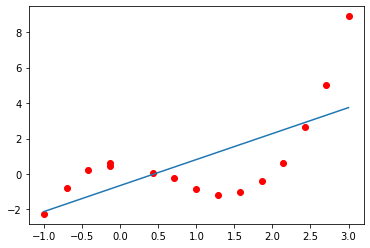

In [147]:
# ... ENTER YOUR CODE HERE ...

import numpy as np
import matplotlib.pyplot as plt

x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

#Pasamos los datos a Array de Numpy
X, Y = np.array(x), np.array(y)

#Creamos la matriz de coeficientes
Xlen = len(X)
unos = np.ones(Xlen)
A = np.c_[unos, X]

#Usando descompision QR
q,r = np.linalg.qr(A)
qt = np.transpose(q)
qty = qt @ Y

#Solucionando
s = np.linalg.solve(r, qty)

#Nos da como solucion s = [b, a]
p = np.poly1d([s[1], s[0]])

print(" mx + b")
print(p)

#Imprimimos
plt.plot(X, Y, "or")
x_plot = np.linspace(-1,3,100)
plt.plot(x_plot, p(x_plot))
plt.show()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

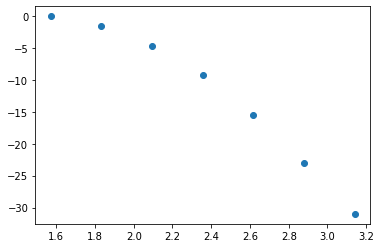

In [134]:
# ... ENTER YOUR CODE HERE ...

import numpy as np
import math
import sympy as sym
import matplotlib.pyplot as plt

#Creacion de puntos
xi = np.array([((np.pi)/2),((105*np.pi)/180),((2*np.pi)/3),((3*np.pi)/4),((5*np.pi)/6),((165*np.pi)/180),(np.pi)])
z = []
for i in xi:
  z.append((i**2) * math.cos(i) * i)
yi = np.array(z)
plt.plot(xi, yi, 'o')

2.3732335931253993e-16
2.37323359312540e-16


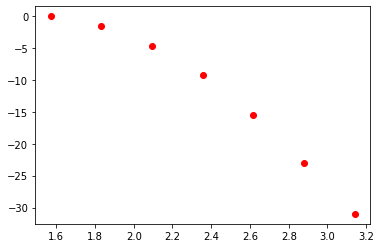

In [135]:
#With m = 1

#n = len(xi)
n = 1
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-xi[j]
      denominador *= xi[i]-xi[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(xi), np.min(xi), 1)
pfi = px(p_xi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

9.55756985571131 - 6.08453794593019*x
9.55756985571131 - 6.08453794593019*x


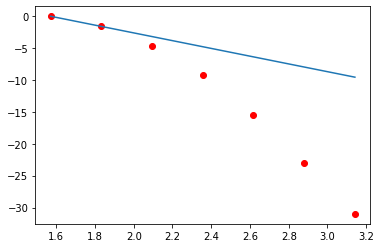

In [136]:
#with m = 2

#n = len(xi)
n = 2
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-xi[j]
      denominador *= xi[i]-xi[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(xi), np.min(xi), 100)
pfi = px(p_xi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

1.73130362434961e-15*(x - 2.0943951023932)*(x - 1.83259571459405) + 23.2412229726*(x - 2.0943951023932)*(x - 1.5707963267949) - 33.5103216382911*(x - 1.83259571459405)*(x - 1.5707963267949)
-10.2690986656912*x**2 + 28.865230725121*x - 20.0034130485756


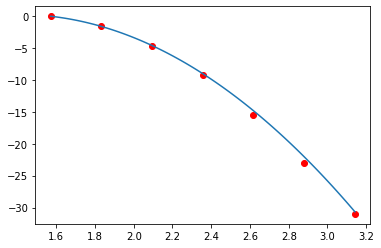

In [137]:
#with m = 3

#n = len(xi)
n = 3
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-xi[j]
      denominador *= xi[i]-xi[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(xi), np.min(xi), 100)
pfi = px(p_xi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

-2.20436423846524e-15*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405) - 44.3874662350824*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.5707963267949) + 128.0*(x - 2.35619449019234)*(x - 1.83259571459405)*(x - 1.5707963267949) - 85.9134739141655*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949)
-2.30094014924784*x**3 + 2.38098050545574*x**2 + 5.84045379835527*x - 6.13104893061131


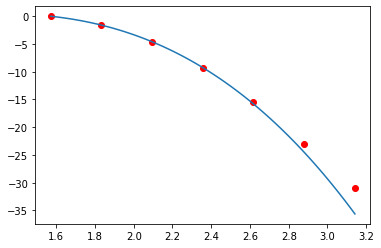

In [138]:
#with m = 4

#n = len(xi)
n = 4
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-xi[j]
      denominador *= xi[i]-xi[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(xi), np.min(xi), 100)
pfi = px(p_xi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

2.10501278956046e-15*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405) + 56.5158773011037*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.5707963267949) - 244.461992589151*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 1.83259571459405)*(x - 1.5707963267949) + 328.165297239265*(x - 2.61799387799149)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) - 137.832223855448*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949)
2.3869580957695*x**4 - 21.0480651944877*x**3 + 57.1868226069801*x**2 - 64.8294693404332*x + 27.776866259308


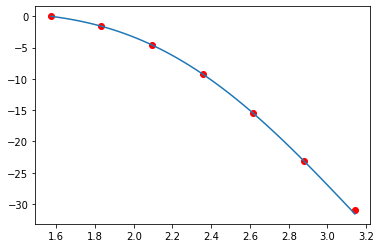

In [139]:
#with m = 5

#n = len(xi)
n = 5
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-xi[j]
      denominador *= xi[i]-xi[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(xi), np.min(xi), 100)
pfi = px(p_xi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

1.02375545961852e-15*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405) + 41.2290401956773*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.5707963267949) - 297.230141336366*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 1.83259571459405)*(x - 1.5707963267949) + 798.002312318926*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.61799387799149)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) - 1005.50333268646*(x - 3.14159265358979)*(x - 2.87979326579064)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) + 597.083001866827*(x - 3.14159265358979)*(x - 2.61799387799149)*(x - 2.35619449019234)*(x - 2.0943951023932)*(x - 1.83259571459405)*(x - 1.5707963267949) - 133.753563601365*(x - 2.87979326579064)*(x - 2.61799387799149)*(

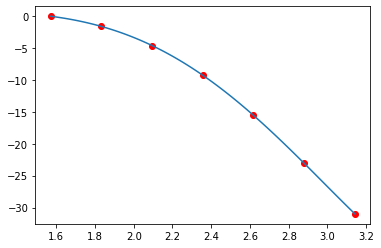

In [149]:
#with m = len(xi)

n = len(xi)
x = sym.Symbol('x')
i = 0
polinomio = 0

#Terminos de Lagrange
for i in range(0,n,1):
  numerador = 1
  denominador = 1
  for j in range(0,n,1):
    if i != j:
      numerador *= x-xi[j]
      denominador *= xi[i]-xi[j]
    termino = (numerador/denominador)*yi[i]
  polinomio += termino
polisimple = sym.expand(polinomio)

print(polinomio)
print(polisimple)

px = sym.lambdify(x,polinomio)
p_xi = np.linspace(np.max(xi), np.min(xi), 100)
pfi = px(p_xi)

plt.plot(xi, yi, 'or')
plt.plot(p_xi, pfi)
plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [163]:
# ... ENTER YOUR CODE HERE ...